In [17]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [28]:
np.random.seed(7)
N = 300
df = pd.DataFrame({
    "region":  np.random.choice(["North","South","East","West"], size=N, p=[.25,.25,.25,.25]),
    "plan":    np.random.choice(["Basic","Pro","Enterprise"], size=N, p=[.5,.35,.15]),
    "tickets": np.random.poisson(lam=3, size=N),                     # count data
    "latency": np.random.gamma(shape=2, scale=20, size=N),            # positive skew
    "throughput": np.random.normal(loc=100, scale=15, size=N),        # roughly normal
})
df

,region,plan,tickets,latency,throughput
0,North,Enterprise,3,94.472035,119.480307
1,West,Basic,2,26.565530,89.834902
2,South,Basic,3,35.478501,97.897731
3,East,Enterprise,2,65.436261,101.027419
4,West,Basic,2,77.685107,99.936240
...,...,...,...,...,...
295,North,Enterprise,1,9.843772,80.883606
296,East,Basic,1,23.109043,120.028201
297,North,Basic,2,6.315125,96.186537
298,North,Basic,2,60.770024,117.816295


1) Bar plot — categorical → number (counts or summary)

Use when: comparing categories (e.g., tickets by plan).

In [32]:
counts = df['plan'].value_counts()
counts.values

array([158,  86,  56])

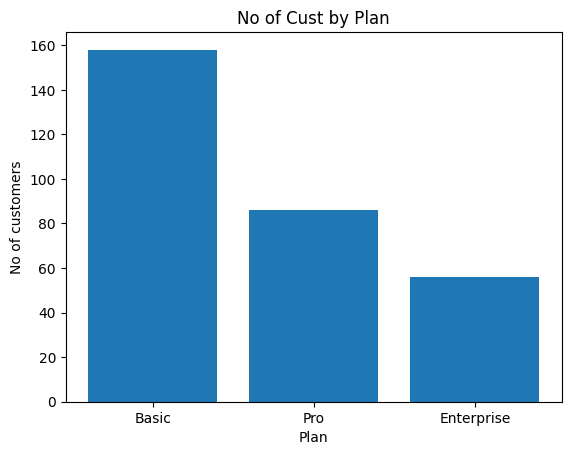

In [35]:
#using matplotlib
counts = df['plan'].value_counts()
plt.bar(counts.index, counts.values)
plt.ylabel("No of customers")
plt.xlabel("Plan")
plt.title("No of Cust by Plan")
plt.show()


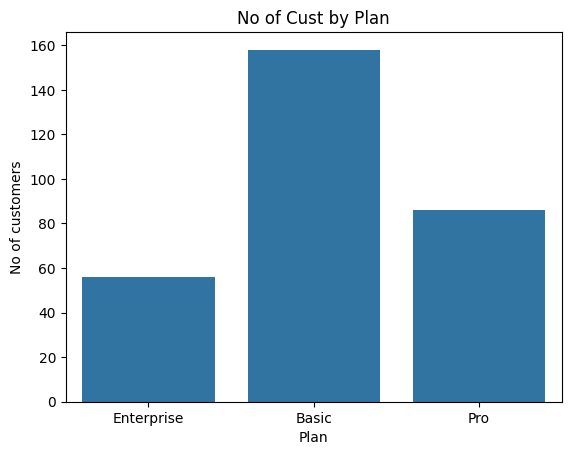

In [37]:
#using seaborn
sns.countplot(x="plan", data=df)
plt.ylabel("No of customers")
plt.xlabel("Plan")
plt.title("No of Cust by Plan")
plt.show()



2) Scatter plot — numeric vs numeric (relationship)

Use when: checking correlation/outliers (e.g., throughput vs latency).

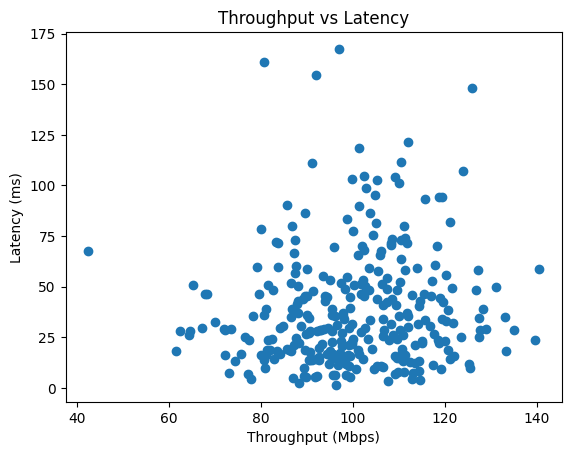

In [40]:
#using matplotlib

plt.scatter(df["throughput"], df["latency"])
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Latency (ms)")
plt.title("Throughput vs Latency")
plt.show()

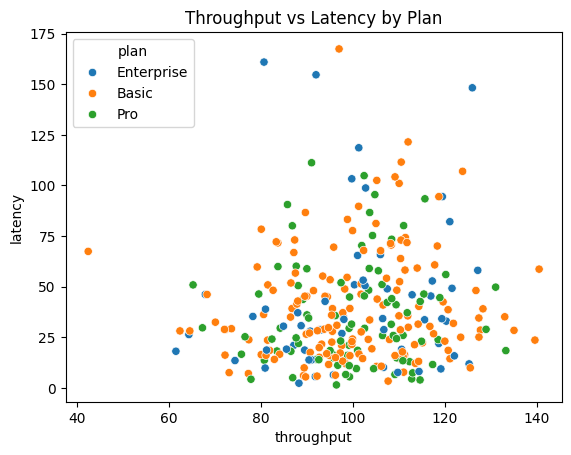

In [45]:
#using seaborn
sns.scatterplot(x="throughput", y="latency", hue="plan", data=df)
plt.title("Throughput vs Latency by Plan"); plt.show()



3) Box plot — distribution + outliers

Use when: comparing distributions/medians (robust to outliers).

/tmp/ipython-input-4118574574.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df["plan"].unique(), showmeans=True)


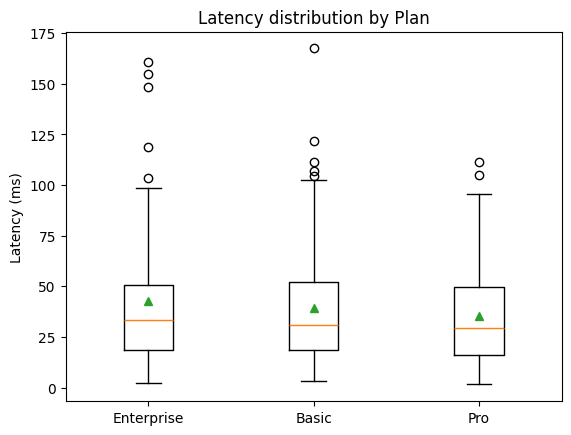

In [46]:
#using matplotlib

groups = [df.loc[df.plan==p, "latency"] for p in df["plan"].unique()]
plt.boxplot(groups, labels=df["plan"].unique(), showmeans=True)
plt.ylabel("Latency (ms)"); plt.title("Latency distribution by Plan"); plt.show()


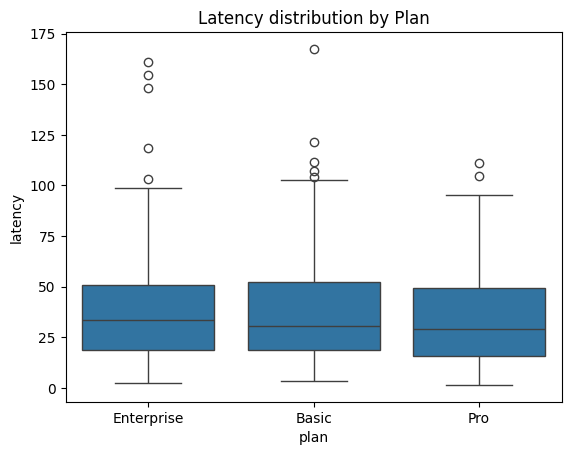

In [47]:
#using seaborn
sns.boxplot(x="plan", y="latency", data=df)
plt.title("Latency distribution by Plan"); plt.show()

4) Histogram — shape of a single numeric variable

Use when: seeing skew, modes, spread.

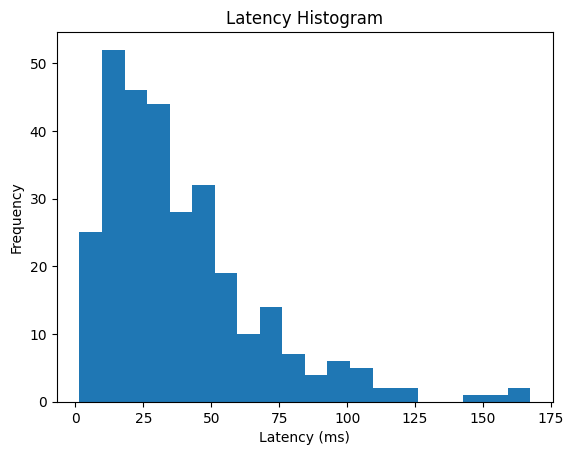

In [10]:
#using matplotlib

plt.hist(df["latency"], bins=20)
plt.xlabel("Latency (ms)"); plt.ylabel("Frequency")
plt.title("Latency Histogram"); plt.show()


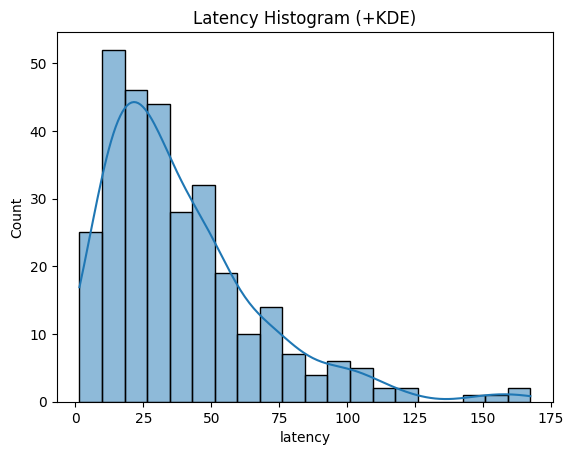

In [11]:
#using seaborn

sns.histplot(df["latency"], bins=20, kde=True)
plt.title("Latency Histogram (+KDE)"); plt.show()


5) Heat map — values in a matrix (correlations, pivots)

Use when: visualizing correlation

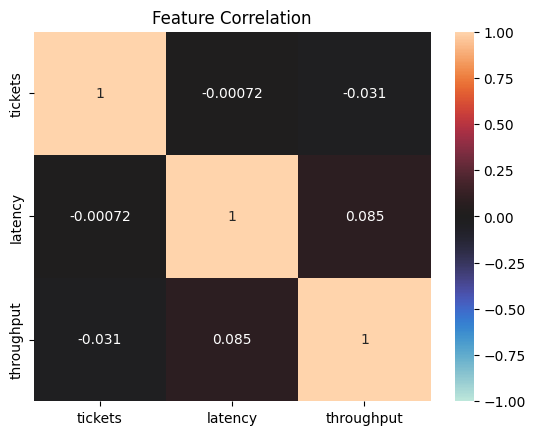

In [12]:
#using seaborn

num_cols = df[["tickets","latency","throughput"]]
corr = num_cols.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0)
plt.title("Feature Correlation"); plt.show()


6) Pie chart — share of whole

Use when: simple part‑to‑whole with few categories (use sparingly; bars are clearer).

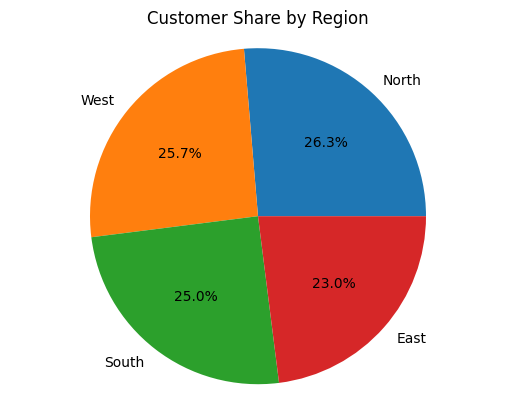

In [15]:
#using matplotlib
share = df["region"].value_counts()
plt.pie(share.values, labels=share.index, autopct="%1.1f%%")
plt.title("Customer Share by Region"); plt.axis("equal"); plt.show()


Multichart: 4 charts in a 2×2 grid

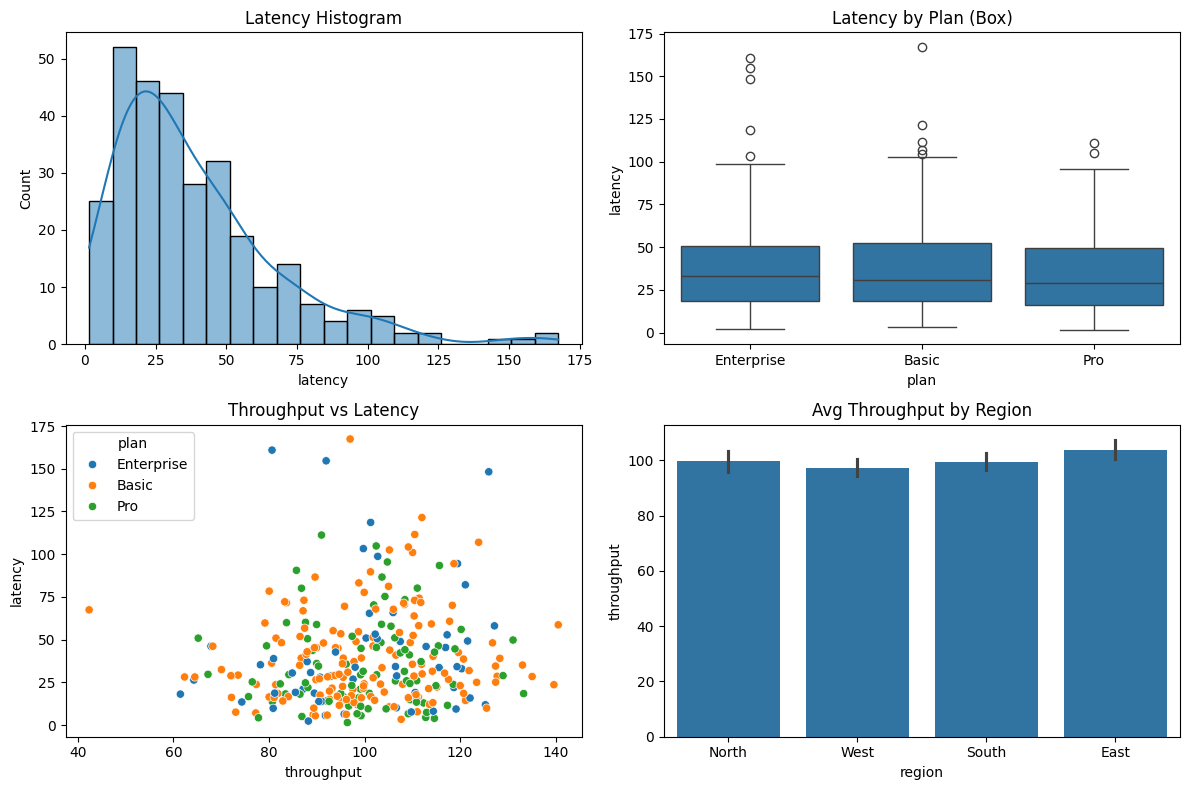

In [16]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 cols

# 1) Histogram
sns.histplot(df["latency"], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("Latency Histogram")

# 2) Box plot
sns.boxplot(x="plan", y="latency", data=df, ax=axes[0,1])
axes[0,1].set_title("Latency by Plan (Box)")

# 3) Scatter plot
sns.scatterplot(x="throughput", y="latency", data=df, ax=axes[1,0], hue="plan")
axes[1,0].set_title("Throughput vs Latency")

# 4) Bar plot
sns.barplot(x="region", y="throughput", data=df, ax=axes[1,1], estimator=np.mean)
axes[1,1].set_title("Avg Throughput by Region")

plt.tight_layout()  # adjust spacing
plt.show()
